<a href="https://colab.research.google.com/github/zahta/Deep_Learning_F20_Assignments/blob/master/Assignments/Assignment_Set_2/3_layers_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building and implementing a neural network from scratch in Python
By [Zahra Taheri](https://github.com/zahta), October 19, 2020

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A Feedforward neural network with 3 layers
- ReLU activation functions
- MSE Loss

In [2]:
class ThreeLayersFNN():

    def __init__(self, layers=[4,4,2,1], lr=0.01): 
        self.parameters = {}
        self.loss = []
        self.layers = layers
        self.lr = lr
        #self.iters = epochs
        self.sample_size = None
        self.X = None
        self.y = None   
        
 

    def initialize_weights(self):       
        ''' 
        Random weights and biases for different layers
        '''
        # seed for random number generation
        np.random.seed(42)      
        '''
        Hidden Layer 1
        '''
        self.parameters['W1_1'] = 0.10 * np.random.random((self.layers[0], self.layers[1]))
        self.parameters['b1_1'] = 0.010 * np.ones((self.layers[1],))
        self.parameters['W2_1'] = 0.10 * np.random.random((self.layers[1],self.layers[2]))
        self.parameters['b2_1'] = 0.010 * np.ones((self.layers[2],))
        '''
        Hidden Layer 2
        ''' 
        self.parameters['W1_2'] = 0.10 * np.random.random((self.layers[2], self.layers[3]))
        self.parameters['b1_2'] = 0.010 * np.ones((self.layers[3],))

        
        
    def relu(self, z):
        '''
        ReLU activation function
        '''
        return np.maximum(0, z)
   

        
    def sigmoid(self, z):
        '''
        Sigmoid activation function
        '''
        return 1.0/(1.0 + np.exp(-z))
    
    
    
    def sigmoid_der(self, z):
        '''
        Derivative of Sigmoid activation function
        '''
        return self.sigmoid(z) *(1.0 - self.sigmoid (z))
    
    
    
    def relu_der(self, z):
        '''
        Derivative of ReLU activation function
        '''
        z[z<=0] = 0
        z[z>0] = 1
        return z
    
    
    
    def mse_loss(self, y, yhat):
        '''
        Mean square error loss
        '''
        error = ((1/2) * (np.power((y - yhat), 2)))
        loss = error.sum()
        return loss
    
    
    
    #def crossentropy_loss(self, y, yhat):
    #    '''
    #    Cross entropy loss
    #    '''
    #    nsample = len(y)
    #    loss = -(1 / nsample) * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
    #    return loss
    
    
    
    def feedforward(self):
        '''
        Forward propagation
        '''
        Z1 = np.dot(self.X, self.parameters['W1_1']) + self.parameters['b1_1']
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.parameters['W2_1']) + self.parameters['b2_1']
        A2 = self.relu(Z2)
        #print(A2)
        Z3 = np.dot(A2, self.parameters['W1_2']) + self.parameters['b1_2']
        yhat = self.relu(Z3)
        loss = self.mse_loss(self.y, yhat)
        
        # save new parameters     
        self.parameters['Z1'] = Z1
        self.parameters['Z2'] = Z2
        self.parameters['Z3'] = Z3
        self.parameters['A1'] = A1
        self.parameters['A2'] = A2
        
        return yhat,loss
        
        
        
    def backpropagation(self, yhat):  
        '''
        Back propagation
        '''
        # application of the chain rule to find derivative of the loss function with respect to the parameters    
        
        #dloss_dyhat = self.y - yhat
        #dloss_dW1_2 = np.dot(self.parameters['A2'].T, dloss_dyhat)
        #dloss_db1_2 = np.sum(dloss_dyhat, axis=0)   
        #dloss_db1_2 = np.dot(dloss_dyhat, np.ones((1,)))
        #print(dloss_db1_2)
        
        
        dloss_dyhat = self.y - yhat
        dloss_dZ3 = dloss_dyhat * self.relu_der(self.parameters['Z3'])
        #print(self.relu_der(self.parameters['Z3']))
        dloss_dW1_2 = np.dot(self.parameters['A2'].T, dloss_dZ3)
        dloss_db1_2 = np.sum(dloss_dZ3, axis=0)
        
        dloss_dA2 = np.dot(dloss_dyhat, self.parameters['W1_2'].T)
        #print("self.relu_der(self.parameters['Z2']", self.relu_der(self.parameters['Z2']))
        dloss_dZ2 = dloss_dA2 * self.relu_der(self.parameters['Z2'])
        dloss_dW2_1 = np.dot(self.parameters['A1'].T, dloss_dZ2)
        dloss_db2_1 = np.sum(dloss_dZ2, axis=0)
        
        dloss_dA1 = np.dot(dloss_dZ2, self.parameters['W2_1'].T)
        #print("self.relu_der(self.parameters['Z1']", self.relu_der(self.parameters['Z1']))
        dloss_dZ1 = dloss_dA1 * self.relu_der(self.parameters['Z1'])
        dloss_dW1_1 = np.dot(self.X.T, dloss_dZ1)
        dloss_db1_1 = np.sum(dloss_dZ1, axis=0)
        #print("dloss_dyhat",dloss_dyhat, "dloss_dW1_2", dloss_dW1_2)
        #print("dloss_dA2", dloss_dA2, "dloss_dZ2",dloss_dZ2,"dloss_dW2_1", dloss_dW2_1, "dloss_db2_1", dloss_db2_1)
        #print("dloss_dA1", dloss_dA1, "dloss_dZ1",dloss_dZ1,"dloss_dW1_1", dloss_dW1_1, "dloss_db1_1", dloss_db1_1)
        
        # update weights and biases with the derivatives of loss function
        self.parameters['W1_1'] += self.lr * dloss_dW1_1
        self.parameters['b1_1'] += self.lr * dloss_db1_1
        self.parameters['W2_1'] += self.lr * dloss_dW2_1
        self.parameters['b2_1'] += self.lr * dloss_db2_1
        self.parameters['W1_2'] += self.lr * dloss_dW1_2
        self.parameters['b1_2'] += self.lr * dloss_db1_2

   

    def fit(self, X, y, epochs):
        '''
        Train the neural network (using training set and labels)
        '''
        self.X = X
        self.y = y
        self.initialize_weights() 

        for i in range(epochs):
            yhat, loss = self.feedforward()
            self.backpropagation(yhat)
            self.loss.append(loss)
            print("After {} epochs, the loss is {}.".format(i, loss))
            
        print("yhat: ", yhat)
        print("y: ", y)
            
            
    
    def predict(self, X_test):
        '''
        Test the neural network (using test set and labels)
        '''
        Z1 = np.dot(self.X, self.parameters['W1_1']) + self.parameters['b1_1']
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.parameters['W2_1']) + self.parameters['b2_1']
        A2 = self.relu(Z2)
        #print(A2)
        Z3 = np.dot(A2, self.parameters['W1_2']) + self.parameters['b1_2']
        y_pred = self.relu(Z3)
        return np.round(y_pred)              

    
                                
    def test_loss(self, y_test, yhat_test):
        '''
        Loss of the test set
        '''
        loss_t = self.mse_loss(y_test, yhat_test)
        return loss_t

    

    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.title("Loss curve for training")
        plt.show()

In [3]:
X = np.array([[0, 0, 1,1],
              [0, 1, 1,1],
              [1, 0, 1,0],
              [1, 1, 1,0],
              [1, 1, 1,1]])
y = np.array([[1],
              [0],
              [1],
              [0],
              [1]])

y.shape


(5, 1)

In [4]:
nn = ThreeLayersFNN()
nn.fit(X,y,3000)

After 0 epochs, the loss is 1.4588504027387224.
After 1 epochs, the loss is 1.3741935690254268.
After 2 epochs, the loss is 1.2978431604564244.
After 3 epochs, the loss is 1.228987100867707.
After 4 epochs, the loss is 1.166892694932098.
After 5 epochs, the loss is 1.1108988104521398.
After 6 epochs, the loss is 1.0604088473160267.
After 7 epochs, the loss is 1.0148844103228059.
After 8 epochs, the loss is 0.9738396125421681.
After 9 epochs, the loss is 0.936835944090765.
After 10 epochs, the loss is 0.9034776483826996.
After 11 epochs, the loss is 0.873407554206355.
After 12 epochs, the loss is 0.8463033175214654.
After 13 epochs, the loss is 0.8218740317640937.
After 14 epochs, the loss is 0.7998571697796273.
After 15 epochs, the loss is 0.7800158243475221.
After 16 epochs, the loss is 0.7621362176776109.
After 17 epochs, the loss is 0.7460254532986326.
After 18 epochs, the loss is 0.7315094864701328.
After 19 epochs, the loss is 0.7184312916678967.
After 20 epochs, the loss is 0.706

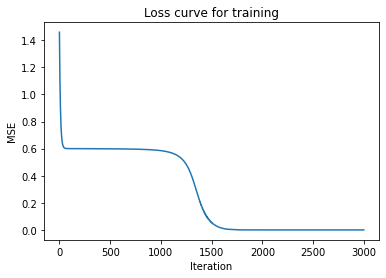

In [5]:
nn.plot_loss()

### Dataset: California housing values

### Import libraries

In [6]:
#For some basic operations
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# to make this notebook's output identical at every run
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [7]:
data=pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [8]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Descriptive statistics and data visualizations

In [10]:
#Describe the dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

ocean_proximity    5
dtype: int64

In [12]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


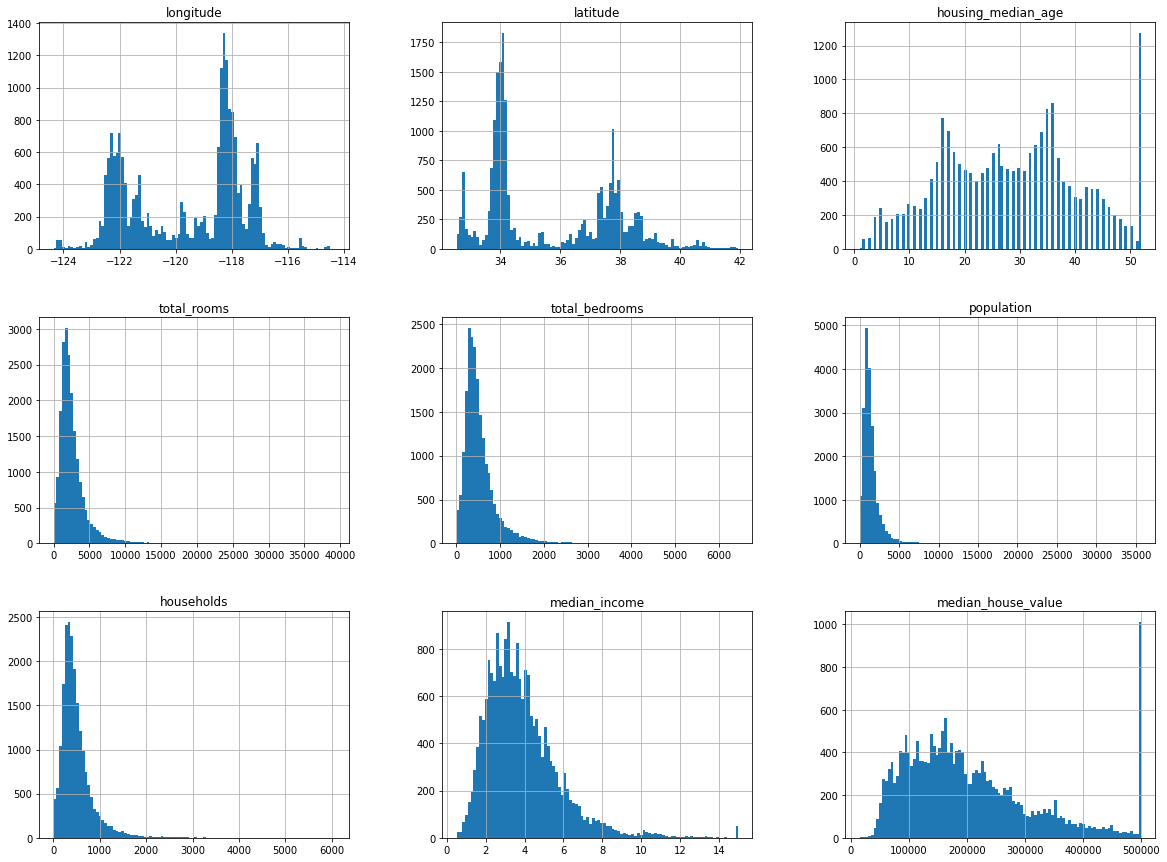

In [13]:
data.hist(bins=100, figsize=(20,15))

plt.show()

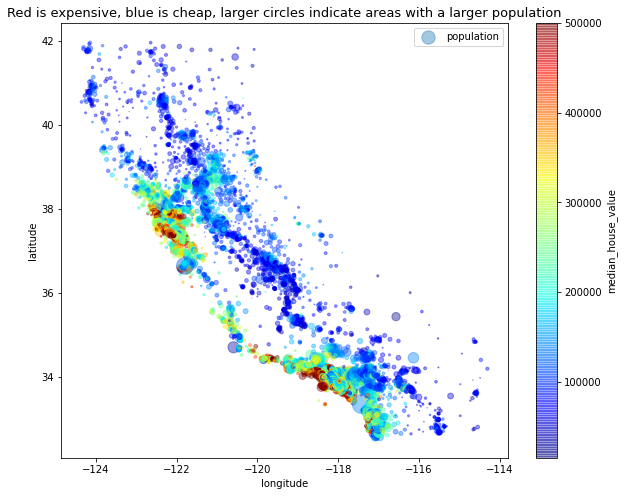

In [14]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Red is expensive, blue is cheap, larger circles indicate areas with a larger population',\
          fontweight = 20, fontsize = 13)
plt.legend()

In [15]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [16]:
#from pandas.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income", "total_rooms",
             # "housing_median_age"]
#scatter_matrix(data[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

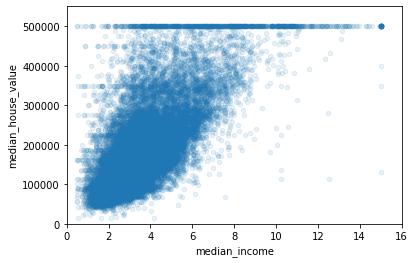

In [17]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Data Cleaning and Preparation

In [18]:
#Fill in missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [19]:
#Remove the text attribute because median can only be calculated on numerical attributes:
data_num=data.drop("ocean_proximity", axis=1)

In [20]:
imputer.fit(data_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [21]:
X = imputer.transform(data_num)
data_num_clean = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_num_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [22]:
data_num_clean["rooms_per_household"] = data_num_clean["total_rooms"]/data_num_clean["households"]
data_num_clean["bedrooms_per_room"] = data_num_clean["total_bedrooms"]/data_num_clean["total_rooms"]
data_num_clean["population_per_household"]=data_num_clean["population"]/data_num_clean["households"]

In [23]:
#Preprocess the categorical input feature, `ocean_proximity`:
data_cat = data[["ocean_proximity"]]

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

In [25]:
#ordinal_encoder.categories_

In [26]:
data_num_clean["ocean_proximity"]=data_cat_encoded
data_clean=data_num_clean
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,3.0


In [27]:
housing_labels = data_clean["median_house_value"]
data_clean = data_clean.drop("median_house_value", axis=1)
data_clean["median_house_value"] = housing_labels
data_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,3.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,3.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,3.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,3.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,3.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,1.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,1.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,1.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,1.0,84700.0


In [28]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
X_scaled = minmax_scale.fit_transform(data_clean)
X_scaled.shape

(20640, 13)

In [29]:
#Splitting the dependent and independent variables

X = X_scaled[:,:-1]
y = X_scaled[:,-1]

print(X.shape)
print(y.shape)

(20640, 12)
(20640,)


In [30]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)

(16512, 12)
(16512,)
(4128, 12)


In [31]:
# Without Normalization of the data

train_data = train_data
test_data = test_data
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)

In [32]:
train_labels

array([[0.18144461],
       [0.75690616],
       [0.32494918],
       ...,
       [0.42701061],
       [0.55360803],
       [0.63917468]])

### Train the model

In [ ]:
nn = ThreeLayersFNN(layers=[12,32,100,1], lr=0.00001) # create the NN model
nn.fit(train_data, train_labels, 2000)

After 0 epochs, the loss is 2595.2433880643216.
After 1 epochs, the loss is 505.19110974049573.
After 2 epochs, the loss is 437.5326996592188.
After 3 epochs, the loss is 430.68802740094554.
After 4 epochs, the loss is 428.76609176585873.
After 5 epochs, the loss is 427.1304768691393.
After 6 epochs, the loss is 425.5447229687251.
After 7 epochs, the loss is 423.9962665479301.
After 8 epochs, the loss is 422.4823521069718.
After 9 epochs, the loss is 421.00079239528384.
After 10 epochs, the loss is 419.5495695725045.
After 11 epochs, the loss is 418.12680609459005.
After 12 epochs, the loss is 416.7307524565845.
After 13 epochs, the loss is 415.35977677918504.
After 14 epochs, the loss is 414.01235543359485.
After 15 epochs, the loss is 412.6870645549207.
After 16 epochs, the loss is 411.3825723450386.
After 17 epochs, the loss is 410.0976320809486.
After 18 epochs, the loss is 408.83107575506494.
After 19 epochs, the loss is 407.5818082825504.
After 20 epochs, the loss is 406.34880221

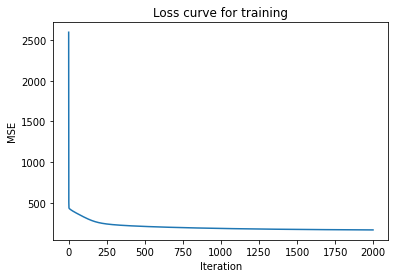

In [35]:
nn.plot_loss()